# Gaussian Mixture Models

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Load the wine dataset
data = pd.read_csv('wine_original.csv')
labels = data['class']
data.head(4)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [43]:
labels-=1
del data['class']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

In [44]:
# Model
clf = GaussianMixture(n_components=3, covariance_type='tied')  

clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                for i in range(3)])
# fit
clf.fit(X_train, y_train)
# predict
pred_train = clf.predict(X_train)
pred = clf.predict(X_test)
#evaluate
print ('Train accuracy = ' + str(accuracy_score(y_train, pred_train)))
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Train accuracy = 0.823943661971831
Test accuracy = 0.7777777777777778


In [45]:
#Thanks Ron Weiss for this code.

colors = ['navy', 'turquoise', 'darkorange']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [ ]:
# Model
estimator = GaussianMixture(n_components=3, covariance_type='tied', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(8,8))
plt.ylim([-1,3])
plt.xlim([11,15])
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)

/Users/rithesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


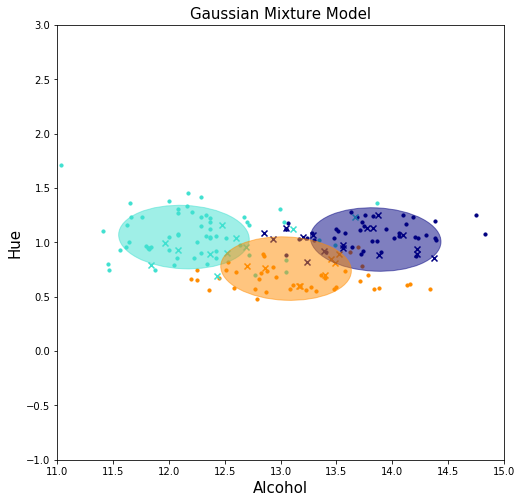

In [54]:
plt.title('Gaussian Mixture Model', fontsize=15)
plt.show()

In [55]:
print (estimator.covariances_)

[[ 0.17118458 -0.00579269]
 [-0.00579269  0.0426741 ]]


In [ ]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

# clf = GaussianMixture(n_components=3,
#                    covariance_type='diag', max_iter=20, random_state=0)

# clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
#                                 for i in range(3)])
# clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("GMM for features (Alcohol,Hue)", fontsize=20)

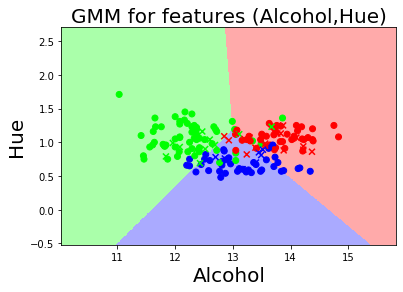

In [48]:
plt.show()

In [ ]:
# Model
# covariance_type='full' vs covariance_type='tied'

estimator = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, random_state=0)

estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(3)])

# Fit
estimator.fit(X_train, y_train)

# Plot
plt.figure(figsize=(8,8))
plt.ylim([-1,3])
plt.xlim([11,15])
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)
h = plt.subplot()
make_ellipses(estimator, h)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[y_train == n]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)

plt.title('Gaussian Mixture Model', fontsize=15)

/Users/rithesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Gaussian Mixture Model')

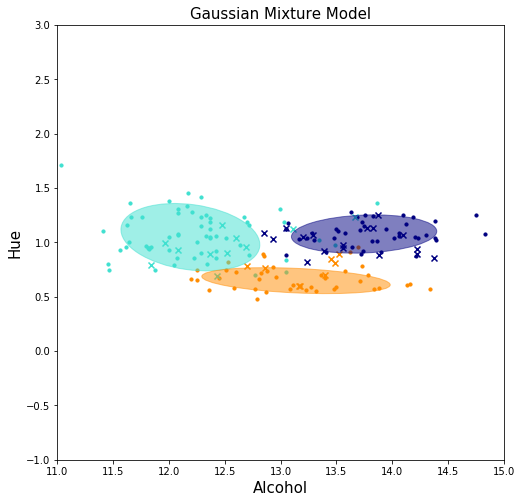

In [56]:
plt.show()

In [50]:
print (estimator.covariances_)

[[[ 0.21193334  0.00804302]
  [ 0.00804302  0.01549938]]

 [[ 0.19364771 -0.02156942]
  [-0.02156942  0.04801611]]

 [[ 0.35643077 -0.01636263]
  [-0.01636263  0.00713873]]]


In [ ]:
from matplotlib.colors import ListedColormap

h = .008  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


X_train, X_test, y_train, y_test = train_test_split(data[['Alcohol', 'Hue']], labels, test_size=0.2, random_state=5)

# clf = GaussianMixture(n_components=3,
#                    covariance_type='diag', max_iter=20, random_state=0)

# clf.means_init = np.array([X_train[y_train == i].mean(axis=0)
#                                 for i in range(3)])
# clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
y_min, y_max = X_train['Hue'].min() - 1, X_train['Hue'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train['Alcohol'], X_train['Hue'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['Alcohol'], X_test['Hue'], c=y_test, marker='x', cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Hue', fontsize=20)
plt.title("GMM for features (Alcohol,Hue)", fontsize=20)

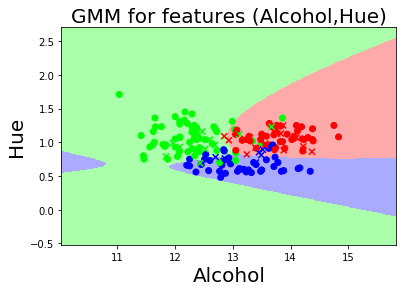

In [51]:
plt.show()

# Fisher Discriminant Analysis 

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

# Intialize
clf = LinearDiscriminantAnalysis()
# Train
clf.fit(X_train, y_train, )
# Test
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# print the accuracy
print ('Training accuracy = ' + str(np.sum(y_train_pred == y_train)/len(y_train)))
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

Training accuracy = 1.0
Test accuracy = 0.9444444444444444


In [ ]:
n_classes = len(np.unique(y_train))


# Plot
plt.figure(figsize=(10,10))
plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Hue', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_train[(y_train == n).values]
    plt.scatter(train_data['Alcohol'], train_data['Hue'], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test[y_test == n]
    plt.scatter(test_data['Alcohol'], test_data['Hue'], marker='x', color=color)


    
# plt.xticks(())
# plt.yticks(())
plt.title('Original Representation of Data', fontsize=15)

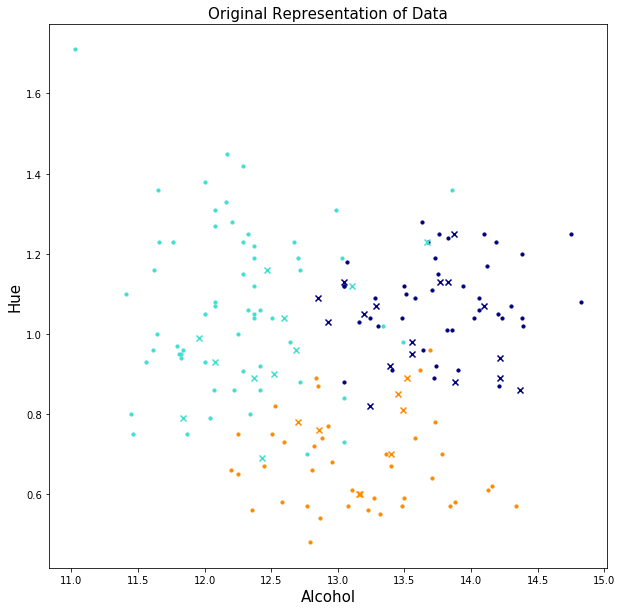

In [37]:
plt.show()

In [38]:
clf = LinearDiscriminantAnalysis()
X_transform = clf.fit(X_train, y_train).transform(X_train)
X_test_transform = clf.transform(X_test)

In [ ]:
n_classes = len(np.unique(y_train))


# Plot
plt.figure(figsize=(10,10))
plt.xlabel('L1', fontsize=15)
plt.ylabel('L2', fontsize=15)

# Plot train data with dots
for n, color in enumerate(colors):
    train_data = X_transform[(y_train == n).values]
    plt.scatter(train_data[:,0], train_data[:,1], s=10, color=color)

# Plot the test data with crosses
for n, color in enumerate(colors):
    test_data = X_test_transform[(y_test == n).values]
    plt.scatter(test_data[:,0], test_data[:,1], marker='x', color=color)

    
# plt.xticks(())
# plt.yticks(())
plt.title('Fisher Discriminant Analysis', fontsize=15)

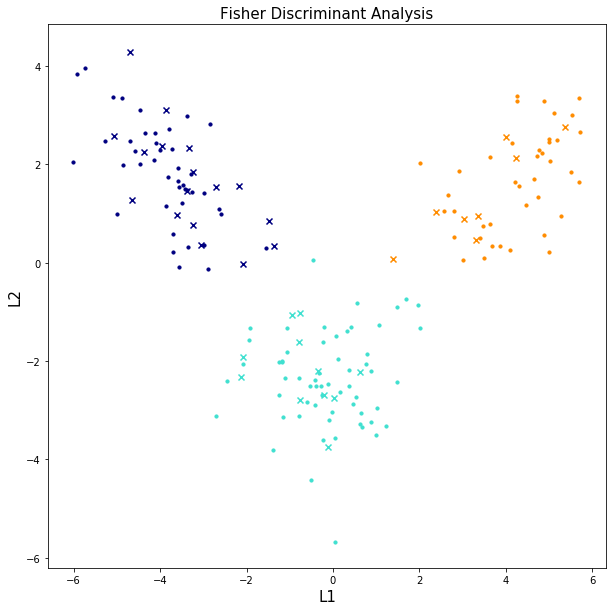

In [39]:
plt.show()